<a href="https://colab.research.google.com/github/DamodaraBarbosa/machine_learning_studies/blob/main/Star_type_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
sns.set()

# Loading the dataframe

In [3]:
df = pd.read_csv('/content/drive/MyDrive/Kaggle/6 class csv.csv')

In [4]:
df.head()

,Temperature (K),Luminosity(L/Lo),Radius(R/Ro),Absolute magnitude(Mv),Star type,Star color,Spectral Class
0,3068,0.002400,0.1700,16.12,0,Red,M
1,3042,0.000500,0.1542,16.60,0,Red,M
2,2600,0.000300,0.1020,18.70,0,Red,M
3,2800,0.000200,0.1600,16.65,0,Red,M
4,1939,0.000138,0.1030,20.06,0,Red,M


# About the dataset

From Kaggle: https://www.kaggle.com/datasets/deepu1109/star-dataset

This CSV file contains a dataset of 240 stars of 6 classes:

Brown Dwarf -> Star Type = 0

Red Dwarf -> Star Type = 1

White Dwarf-> Star Type = 2

Main Sequence -> Star Type = 3

Supergiant -> Star Type = 4

Hypergiant -> Star Type = 5

The Luminosity and radius of each star is calculated w.r.t. that of the values of Sun.

Lo = 3.828 x 10^26 Watts

Ro = 6.9551 x 10^8 m

## Dataset's dimensions

In [5]:
print(f'Number of columns: {df.shape[1]}')
print(f'Number of rows: {df.shape[0]}')

Number of columns: 7
Number of rows: 240


## Dataset's infos

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 240 entries, 0 to 239
Data columns (total 7 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Temperature (K)         240 non-null    int64  
 1   Luminosity(L/Lo)        240 non-null    float64
 2   Radius(R/Ro)            240 non-null    float64
 3   Absolute magnitude(Mv)  240 non-null    float64
 4   Star type               240 non-null    int64  
 5   Star color              240 non-null    object 
 6   Spectral Class          240 non-null    object 
dtypes: float64(3), int64(2), object(2)
memory usage: 13.2+ KB


There are no null value in the intire dataset.

# Column renaming

To make access to dataframe column information, columns are renamed.

In [7]:
df.columns = ['temperature', 'luminosity', 
              'radius', 'absolute_magnitude', 
              'star_type', 'star_color', 'spectral_class']

In [8]:
df.head()

,temperature,luminosity,radius,absolute_magnitude,star_type,star_color,spectral_class
0,3068,0.002400,0.1700,16.12,0,Red,M
1,3042,0.000500,0.1542,16.60,0,Red,M
2,2600,0.000300,0.1020,18.70,0,Red,M
3,2800,0.000200,0.1600,16.65,0,Red,M
4,1939,0.000138,0.1030,20.06,0,Red,M


# Exploratory analysis

## Column `temperature`

The unit of temperature used in the data for this quantity is the Kelvin (K) scale.

### Average, median and mode

In [9]:
pd.DataFrame({'Average': df['temperature'].mean(),
              'Median': df['temperature'].median(),
              'Mode': df['temperature'].mode()[0]},
             index= ['Values'])

,Average,Median,Mode
Values,10497.4625,5776.0,3600


### Mean absolute deviation, variance and standard deviation

In [10]:
pd.DataFrame({'Mean absolute deviation': df['temperature'].mad(),
              'Variance': df['temperature'].var(),
              'Standard deviation': df['temperature'].std()},
             index= ['Values'])

,Mean absolute deviation,Variance,Standard deviation
Values,7707.765312,9.124882e+07,9552.425037


### Quartiles

In [11]:
pd.DataFrame(df['temperature'].describe()[['25%', '50%', '75%']])

,temperature
25%,3344.25
50%,5776.00
75%,15055.50


### Histogram

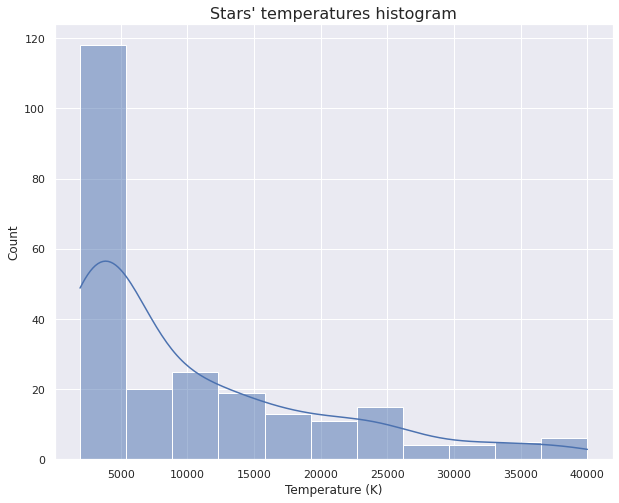

In [12]:
plt.figure(figsize= (10, 8))
ax = sns.histplot(data= df, x= 'temperature', kde= True)
ax.set_title("Stars' temperatures histogram", fontsize= 16)
plt.xlabel('Temperature (K)')
plt.show()

### Boxplot

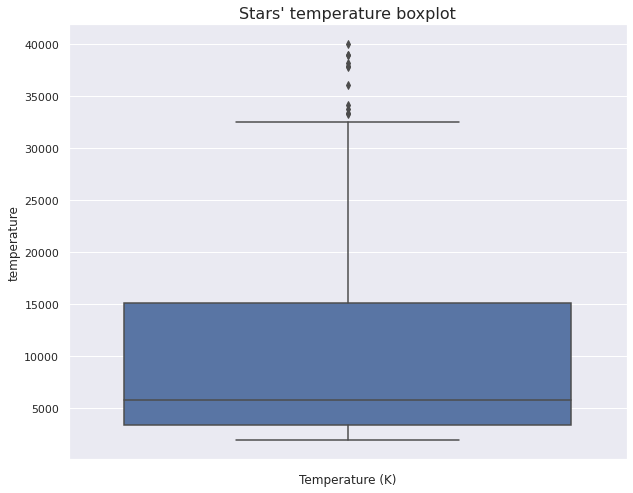

In [13]:
plt.figure(figsize= (10, 8))
ax = sns.boxplot(data= df, y= 'temperature')
ax.set_title("Stars' temperature boxplot", fontsize= 16)
plt.xlabel('Temperature (K)')
plt.show()

* Outliers:

In [14]:
upper_fence_temperature = df['temperature'].quantile(0.75) + (1.5 * (df['temperature'].quantile(0.75) - df['temperature'].quantile(0.25)))

The points above the upper fence of the boxplot are shown below:

In [15]:
df.query('temperature > @upper_fence_temperature').value_counts(['star_type', 'star_color', 'spectral_class'])

star_type  star_color  spectral_class
3          Blue        O                 4
5          Blue        O                 3
4          Blue        B                 2
                       O                 2
dtype: int64

Beyond the upper fence of the boxplot are blue-colored stars and of O and B spectral classes, which is consistent.

## Column `luminosity`

### Average, median and mode

In [16]:
pd.DataFrame({'Average': df['luminosity'].mean(),
              'Median': df['luminosity'].median(),
              'Mode': df['luminosity'].mode()[0]}, 
             index= ['Values'])

,Average,Median,Mode
Values,107188.361635,0.0705,200000.0


### Mean absolute deviation, variance and standard deviation

In [17]:
pd.DataFrame({'Mean deviation': df['luminosity'].mad(),
              'Variance': df['luminosity'].var(),
              'Standard deviation': df['luminosity'].std()},
             index= ['Values'])

,Mean deviation,Variance,Standard deviation
Values,136913.238522,3.219593e+10,179432.24494


### Quartiles

In [18]:
pd.DataFrame(df['luminosity'].describe()[['25%', '50%', '75%']])

,luminosity
25%,0.000865
50%,0.070500
75%,198050.000000


### Histogram

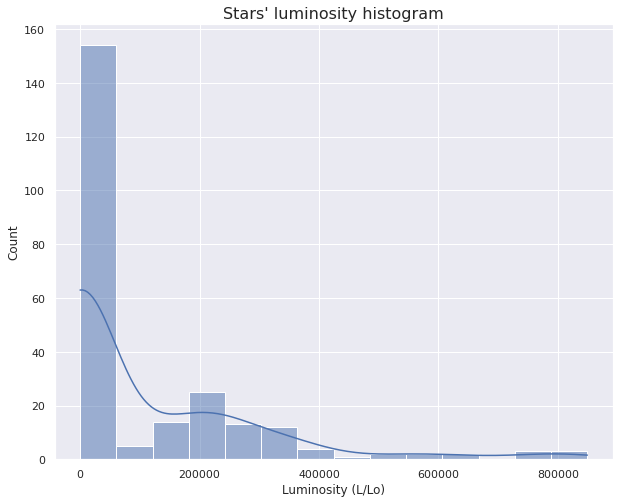

In [19]:
plt.figure(figsize= (10, 8))
ax = sns.histplot(data= df, x= 'luminosity', kde= True)
ax.set_title("Stars' luminosity histogram", fontsize= 16)
plt.xlabel('Luminosity (L/Lo)')
plt.show()

### Boxplot

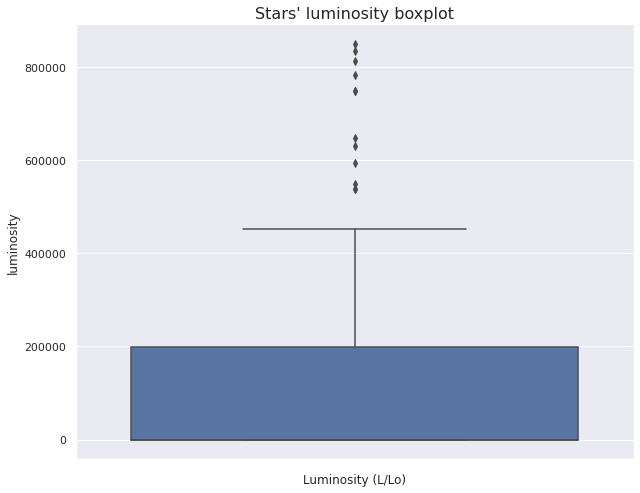

In [20]:
plt.figure(figsize= (10, 8))
ax = sns.boxplot(data=df, y= 'luminosity')
ax.set_title("Stars' luminosity boxplot", fontsize= 16)
plt.xlabel('Luminosity (L/Lo)')
plt.show()

* Outliers:

In [21]:
upper_fence_luminosity = df['luminosity'].quantile(0.75) + (1.5 * (df['luminosity'].quantile(0.75) - df['luminosity'].quantile(0.25)))

The points above the upper fence of the boxplot are shown below:

In [22]:
df.query('luminosity > @upper_fence_luminosity').value_counts(['star_type', 'spectral_class'])

star_type  spectral_class
4          O                 5
5          B                 2
           O                 2
           A                 1
           K                 1
           M                 1
dtype: int64

These data show that the data consists of type 4 and 5 stars. That is, supergiants and hypergiants. It is expected that these stars will indeed have greater luminosity.

## Column `radius`

The data present in the radius variable are determined in relation to the solar radius.

### Average, median and mode

In [23]:
pd.DataFrame({'Average': df['radius'].mean(),
              'Median': df['radius'].median(),
              'Mode': [df['radius'].mode().values]},
             index= ['Values'])

,Average,Median,Mode
Values,237.157781,0.7625,"[0.11, 0.24, 36.0, 1324.0]"


### Mean absolute deviation, variance and standard deviation

In [24]:
pd.DataFrame({'Mean deviation': df['radius'].mad(),
              'Variance': df['radius'].var(),
              'Standard deviation': df['radius'].std()},
             index= ['Values'])

,Mean deviation,Variance,Standard deviation
Values,376.579906,267450.083621,517.155763


### Quartiles

In [25]:
pd.DataFrame(df['radius'].describe()[['25%', '50%', '75%']])

,radius
25%,0.10275
50%,0.76250
75%,42.75000


### Histogram

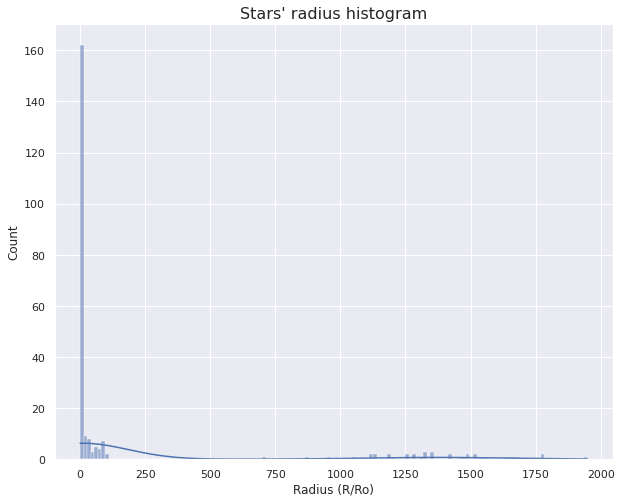

In [26]:
plt.figure(figsize= (10, 8))
ax = sns.histplot(data= df, x= 'radius', kde= True)
ax.set_title("Stars' radius histogram", fontsize= 16)
plt.xlabel('Radius (R/Ro)')
plt.show()

### Boxplot

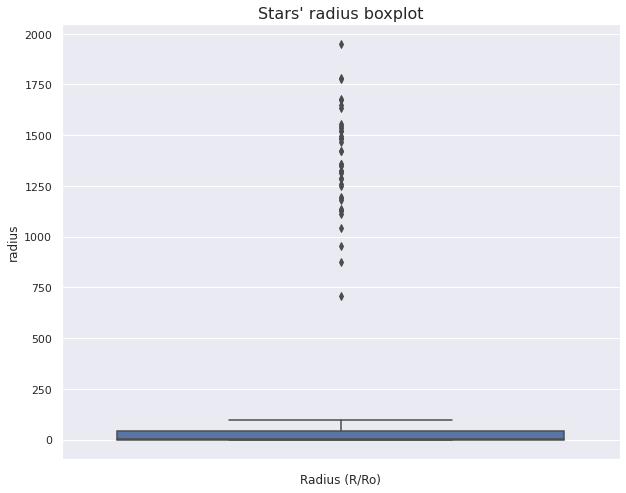

In [27]:
plt.figure(figsize= (10, 8))
ax = sns.boxplot(data= df, y= 'radius')
ax.set_title("Stars' radius boxplot", fontsize= 16)
plt.xlabel('Radius (R/Ro)')
plt.show()

* Outliers:

In [28]:
upper_fence_radius = df['radius'].quantile(0.75) + (1.5 * (df['radius'].quantile(0.75) - df['radius'].quantile(0.25)))
upper_fence_radius

106.720875

The points above the upper fence of the boxplot are shown below:

In [29]:
df.query('radius > @upper_fence_radius').value_counts('star_type')

star_type
5    40
dtype: int64

All points beyond the upper fence of the boxplot show type 5 stars. That is, they are hypergiants. Therefore, the larger values of stellar radius seem consistent.

## Column `absolute_magnitude`

It consists of the absolute visual magnitude (Mv) of the stars.

### Average, median and mode

In [30]:
pd.DataFrame({'Average': df['absolute_magnitude'].mean(),
              'Median': df['absolute_magnitude'].median(),
              'Mode': df['absolute_magnitude'].mode()[0]},
             index= ['Values'])

,Average,Median,Mode
Values,4.382396,8.313,12.23


### Mean absolute deviation, variance and standard deviation

In [31]:
pd.DataFrame({'Mean absolute deviation': df['absolute_magnitude'].mad(),
              'Variance': df['absolute_magnitude'].var(),
              'Standard deviation': df['absolute_magnitude'].std()},
             index= ['Values'])

,Mean absolute deviation,Variance,Standard deviation
Values,9.905969,110.933816,10.532512


### Histogram

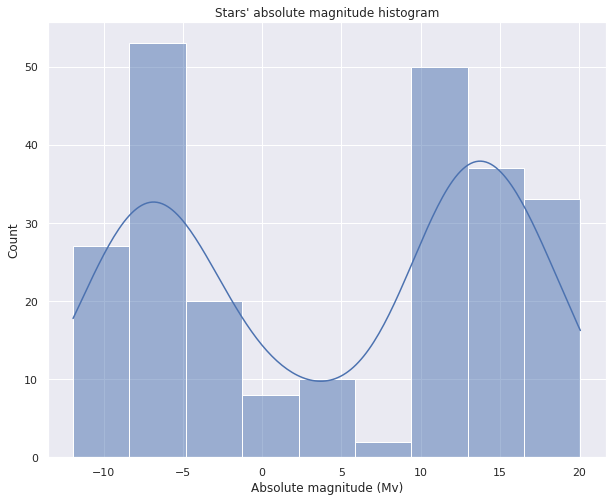

In [32]:
plt.figure(figsize= (10, 8))
ax = sns.histplot(data= df, x= 'absolute_magnitude', kde= True)
ax.set_title("Stars' absolute magnitude histogram")
plt.xlabel('Absolute magnitude (Mv)')
plt.show()

### Boxplot

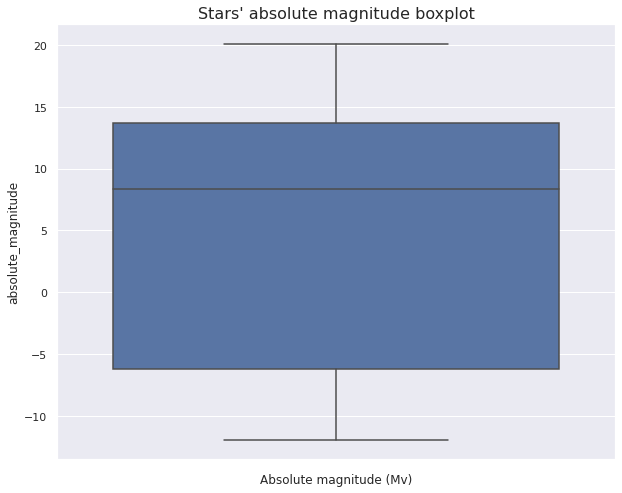

In [33]:
plt.figure(figsize= (10, 8))
ax = sns.boxplot(data= df, y= 'absolute_magnitude')
ax.set_title("Stars' absolute magnitude boxplot", fontsize= 16)
plt.xlabel('Absolute magnitude (Mv)')
plt.show()

## Column `star_color`

It contains the star's colors after spectral analysis.

In [34]:
f'There are {df["star_color"].nunique()} different types of stars in the database regarding their color.'

'There are 19 different types of stars in the database regarding their color.'

The types are:

In [35]:
df['star_color'].unique()

array(['Red', 'Blue White', 'White', 'Yellowish White', 'Blue white',
       'Pale yellow orange', 'Blue', 'Blue-white', 'Whitish',
       'yellow-white', 'Orange', 'White-Yellow', 'white', 'Blue ',
       'yellowish', 'Yellowish', 'Orange-Red', 'Blue white ',
       'Blue-White'], dtype=object)

But some of the data appears to have been entered incorrectly. Therefore, it is necessary that they are reset:

In [36]:
df.replace('Blue ', 'Blue', inplace= True)

In [37]:
df.replace('white', 'White', inplace= True)

In [38]:
df.replace(['Blue White', 'Blue white', 'Blue white ', 'Blue-white'], 'Blue-White', inplace= True)

In [39]:
df.replace('yellowish', 'Yellowish', inplace= True)

And for aesthetic reasons to make all types start with capital letters:

In [40]:
df.replace('yellow-white', 'Yellow-White', inplace= True)

After processing the column data, it is observed that:

In [41]:
f'The database contains {df["star_color"].nunique()} different types of stars according to their colors.'

'The database contains 12 different types of stars according to their colors.'

In [42]:
df['star_color'].unique()

array(['Red', 'Blue-White', 'White', 'Yellowish White',
       'Pale yellow orange', 'Blue', 'Whitish', 'Yellow-White', 'Orange',
       'White-Yellow', 'Yellowish', 'Orange-Red'], dtype=object)

### Stars' color count

In [43]:
count_star_color = pd.DataFrame({'Count': df['star_color'].value_counts(ascending= True)})

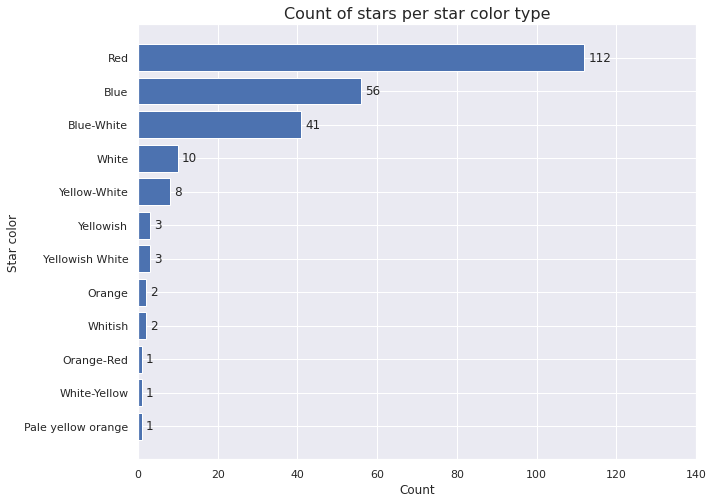

In [44]:
plt.figure(figsize= (10, 8))
bars = plt.barh(count_star_color.index, count_star_color['Count'])

for index, bar in enumerate(bars):
  plt.text(bar.get_width() + 1, index - 0.1, bar.get_width())

plt.title('Count of stars per star color type', fontsize= 16)
plt.xlabel('Count')
plt.ylabel('Star color')
plt.xlim([0, 140])
plt.show()

### How does each variable behave for each type of star? 

#### Temperature

##### Mean, median and standard deviation:

In [45]:
df.groupby('star_color').agg(['mean', 'median', 'std'])['temperature']

,mean,median,std
star_color,,,
Blue,21918.339286,19921.5,9453.979609
Blue-White,16659.951220,14100.0,6560.050964
Orange,4018.000000,4018.0,380.423448
Orange-Red,5112.000000,5112.0,NaN
Pale yellow orange,7230.000000,7230.0,NaN
Red,3291.785714,3324.0,490.780761
White,9720.300000,8879.5,2563.623176
White-Yellow,7100.000000,7100.0,NaN
Whitish,8876.000000,8876.0,1165.311975


##### Histograms:

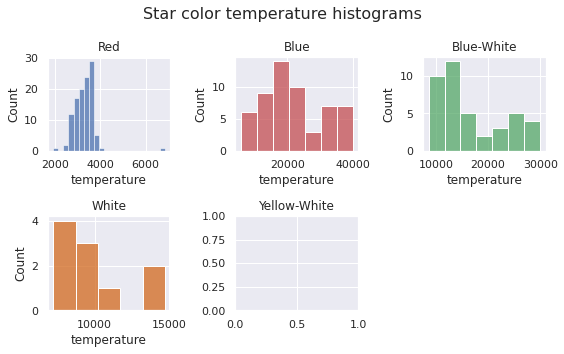

In [46]:
fig, ax = plt.subplots(2, 3, figsize= (8, 5))
fig.suptitle('Star color temperature histograms', fontsize= 16)
ax1 = sns.histplot(data= df.query('star_color == "Red"'), x= 'temperature', ax= ax[0, 0])
ax1.set_title('Red')
ax2 = sns.histplot(data= df.query('star_color == "Blue"'), x= 'temperature', color= 'r', ax= ax[0, 1])
ax2.set_title('Blue')
ax3 = sns.histplot(data= df.query('star_color == "Blue-White"'), x= 'temperature', color= 'g', ax= ax[0, 2])
ax3.set_title('Blue-White')
ax4 = sns.histplot(data= df.query('star_color == "White"'), x= 'temperature', color= 'chocolate', ax= ax[1, 0])
ax4.set_title('White')
ax5 = sns.histplot(data= df.query('spectral_class == "Yellow-White"'), x= 'temperature', color= 'teal', ax= ax[1, 1])
ax5.set_title('Yellow-White')
fig.delaxes(ax[1, 2])
plt.tight_layout()
plt.show()

##### Boxplots:

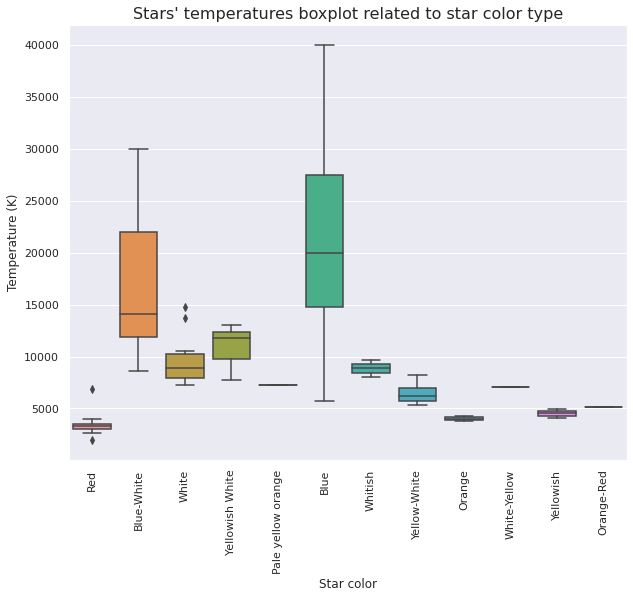

In [47]:
plt.figure(figsize= (10, 8))
ax = sns.boxplot(data= df, x= 'star_color', y= 'temperature')
ax.set_title("Stars' temperatures boxplot related to star color type", fontsize= 16)
plt.xlabel('Star color')
plt.ylabel('Temperature (K)')
plt.xticks(rotation= '90')
plt.show()

The analysis of central tendencies together with the boxplot graph seems to indicate that blue stars tend to have a higher temperature.

#### Luminosity

* Mean, median and standard deviation:

In [48]:
df.groupby('star_color').agg(['mean', 'median', 'std'])['luminosity']

,mean,median,std
star_color,,,
Blue,249974.732446,223890.000000,217947.633816
Blue-White,68904.416521,788.000000,185475.774192
Orange,590000.000000,590000.000000,56568.542495
Orange-Red,0.630000,0.630000,NaN
Pale yellow orange,0.000080,0.000080,NaN
Red,60526.787893,0.002550,104282.874572
White,94243.300229,0.000335,201123.823736
White-Yellow,0.000290,0.000290,NaN
Whitish,41.350000,41.350000,46.174073


##### Histograms:

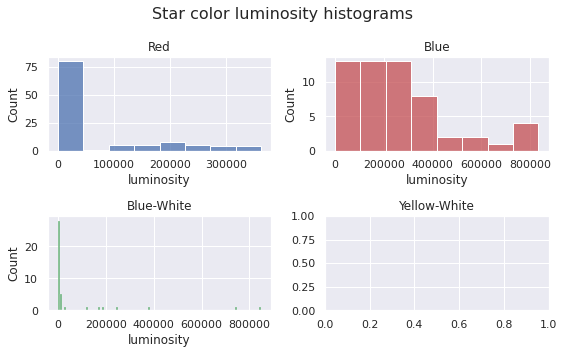

In [49]:
fig, ax = plt.subplots(2, 2, figsize= (8, 5))
fig.suptitle('Star color luminosity histograms', fontsize= 16)
ax1 = sns.histplot(data= df.query('star_color == "Red"'), x= 'luminosity', ax= ax[0, 0])
ax1.set_title('Red')
ax2 = sns.histplot(data= df.query('star_color == "Blue"'), x= 'luminosity', color= 'r', ax= ax[0, 1])
ax2.set_title('Blue')
ax3 = sns.histplot(data= df.query('star_color == "Blue-White"'), x= 'luminosity', color= 'g', ax= ax[1, 0])
ax3.set_title('Blue-White')
ax4 = sns.histplot(data= df.query('spectral_class == "Yellow-White"'), x= 'luminosity', color= 'teal', ax= ax[1, 1])
ax4.set_title('Yellow-White')
plt.tight_layout()
plt.show()

##### Boxplots:

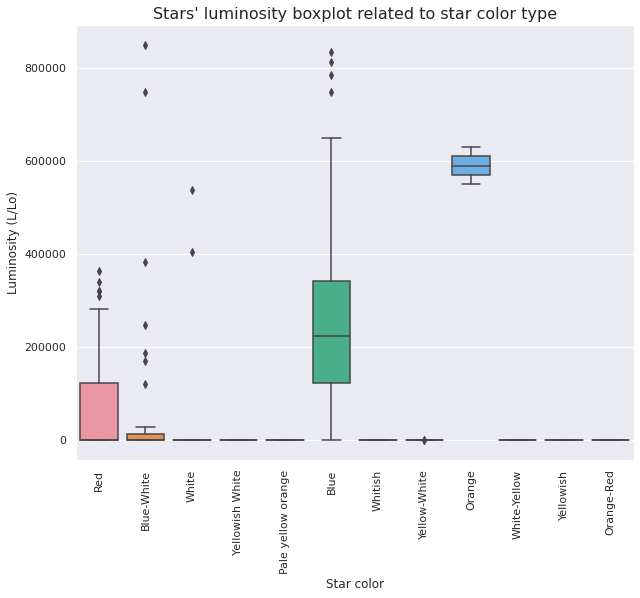

In [50]:
plt.figure(figsize= (10, 8))
ax = sns.boxplot(data= df, x= 'star_color', y= 'luminosity')
ax.set_title("Stars' luminosity boxplot related to star color type", fontsize= 16)
plt.xlabel('Star color')
plt.ylabel('Luminosity (L/Lo)')
plt.xticks(rotation= '90')
plt.show()

A deeper look at orange stars type:

In [51]:
df.query('star_color == "Orange"')

,temperature,luminosity,radius,absolute_magnitude,star_type,star_color,spectral_class
53,3749,550000.0,1648.0,-8.05,5,Orange,M
172,4287,630000.0,1315.0,-9.20,5,Orange,K


Measures of central tendency and the boxplot graph indicate that orange stars have greater luminosity. However, there is a very small amount of such stars in the database (2). In addition, they are type 5, that is, hyper giants.

#### Radius

##### Mean, median and standard deviation:

In [52]:
df.groupby('star_color').agg(['mean', 'median', 'std'])['radius']

,mean,median,std
star_color,,,
Blue,214.802452,35.50000,495.681463
Blue-White,185.800842,5.74500,464.118298
Orange,1481.500000,1481.50000,235.466558
Orange-Red,0.876000,0.87600,NaN
Pale yellow orange,0.013000,0.01300,NaN
Red,283.529700,0.29900,558.149251
White,253.507866,0.00975,539.424654
White-Yellow,0.012000,0.01200,NaN
Whitish,2.345000,2.34500,0.770746


##### Histograms:

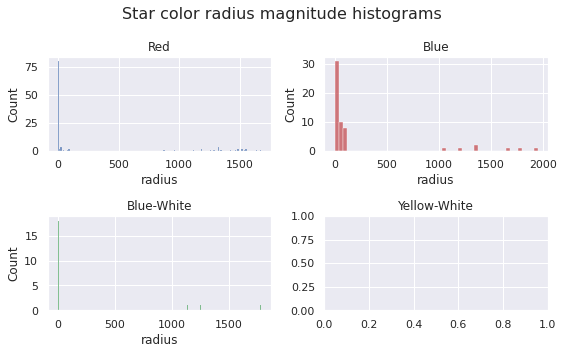

In [53]:
fig, ax = plt.subplots(2, 2, figsize= (8, 5))
fig.suptitle('Star color radius magnitude histograms', fontsize= 16)
ax1 = sns.histplot(data= df.query('star_color == "Red"'), x= 'radius', ax= ax[0, 0])
ax1.set_title('Red')
ax2 = sns.histplot(data= df.query('star_color == "Blue"'), x= 'radius', color= 'r', ax= ax[0, 1])
ax2.set_title('Blue')
ax3 = sns.histplot(data= df.query('star_color == "Blue-White"'), x= 'radius', color= 'g', ax= ax[1, 0])
ax3.set_title('Blue-White')
ax4 = sns.histplot(data= df.query('spectral_class == "Yellow-White"'), x= 'radius', color= 'teal', ax= ax[1, 1])
ax4.set_title('Yellow-White')
# fig.delaxes(ax[1, 2])
plt.tight_layout()
plt.show()

##### Boxplots:

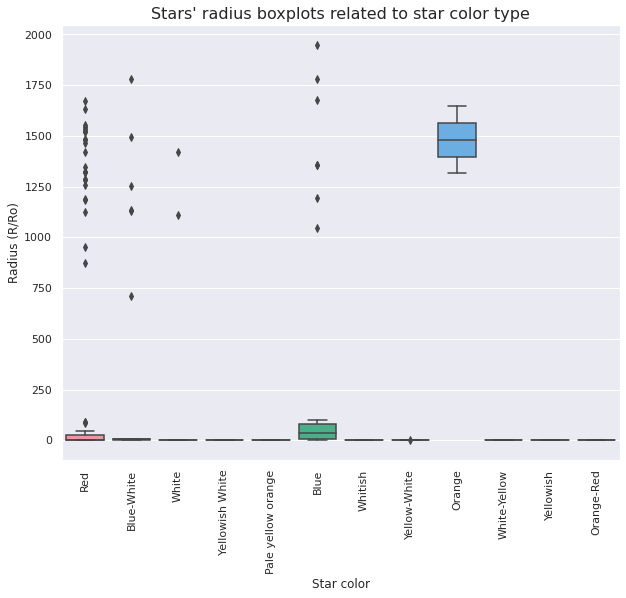

In [54]:
plt.figure(figsize= (10, 8))
ax = sns.boxplot(data= df, x= 'star_color', y= 'radius')
ax.set_title("Stars' radius boxplots related to star color type", fontsize= 16)
plt.xlabel('Star color')
plt.ylabel('Radius (R/Ro)')
plt.xticks(rotation= '90')
plt.show()

There are only two orange stars in the database, both of which are type 5, that is, hyper giants. This can skew the data.

In [55]:
df.groupby('star_color')['star_type'].value_counts()

star_color          star_type
Blue                4            31
                    2            13
                    5             7
                    3             5
Blue-White          3            21
                    2            14
                    5             6
Orange              5             2
Orange-Red          3             1
Pale yellow orange  2             1
Red                 0            40
                    1            40
                    5            23
                    4             9
White               2             8
                    5             2
White-Yellow        2             1
Whitish             3             2
Yellow-White        3             8
Yellowish           3             3
Yellowish White     2             3
Name: star_type, dtype: int64

#### Absolute magnitude

##### Mean, median and standard deviation:

In [56]:
df.groupby('star_color').agg(['mean', 'median', 'std'])['absolute_magnitude']

,mean,median,std
star_color,,,
Blue,-2.382446,-5.9825,7.934955
Blue-White,1.968268,-1.3800,8.089971
Orange,-8.625000,-8.6250,0.813173
Orange-Red,4.680000,4.6800,NaN
Pale yellow orange,14.080000,14.0800,NaN
Red,8.173384,13.0950,11.241259
White,8.726000,13.3750,10.420046
White-Yellow,14.090000,14.0900,NaN
Whitish,1.290000,1.2900,1.598061


##### Histograms:

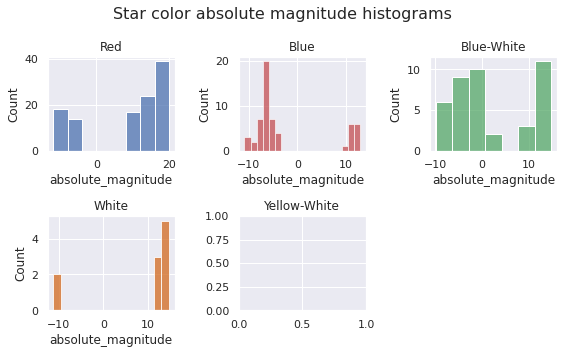

In [57]:
fig, ax = plt.subplots(2, 3, figsize= (8, 5))
fig.suptitle('Star color absolute magnitude histograms', fontsize= 16)
ax1 = sns.histplot(data= df.query('star_color == "Red"'), x= 'absolute_magnitude', ax= ax[0, 0])
ax1.set_title('Red')
ax2 = sns.histplot(data= df.query('star_color == "Blue"'), x= 'absolute_magnitude', color= 'r', ax= ax[0, 1])
ax2.set_title('Blue')
ax3 = sns.histplot(data= df.query('star_color == "Blue-White"'), x= 'absolute_magnitude', color= 'g', ax= ax[0, 2])
ax3.set_title('Blue-White')
ax4 = sns.histplot(data= df.query('star_color == "White"'), x= 'absolute_magnitude', color= 'chocolate', ax= ax[1, 0])
ax4.set_title('White')
ax5 = sns.histplot(data= df.query('spectral_class == "Yellow-White"'), x= 'absolute_magnitude', color= 'teal', ax= ax[1, 1])
ax5.set_title('Yellow-White')
fig.delaxes(ax[1, 2])
plt.tight_layout()
plt.show()

##### Boxplots:

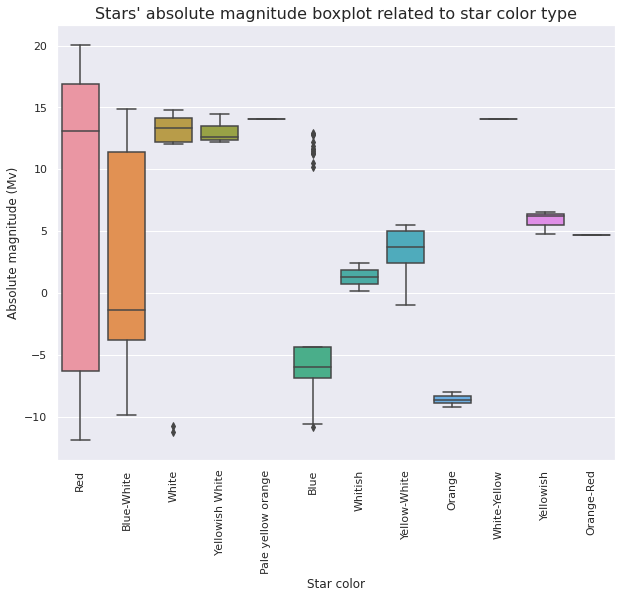

In [58]:
plt.figure(figsize= (10, 8))
ax = sns.boxplot(data= df, x= 'star_color', y= 'absolute_magnitude')
ax.set_title("Stars' absolute magnitude boxplot related to star color type", fontsize= 16)
plt.xlabel('Star color')
plt.ylabel('Absolute magnitude (Mv)')
plt.xticks(rotation= '90')
plt.show()

## Column `spectral_class`

In [59]:
f'There are {df["spectral_class"].nunique()} of stars in terms of spectral class in the database.'

'There are 7 of stars in terms of spectral class in the database.'

The types are:

In [60]:
df['spectral_class'].unique()

array(['M', 'B', 'A', 'F', 'O', 'K', 'G'], dtype=object)

### Stars' spectral class count

In [61]:
count_spectral_class = pd.DataFrame({'Count': df['spectral_class'].value_counts(ascending= True)})

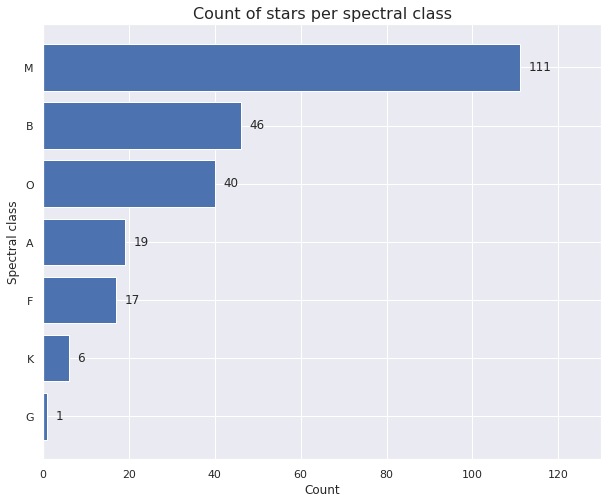

In [62]:
plt.figure(figsize= (10, 8))
bars = plt.barh(count_spectral_class.index, count_spectral_class['Count'])

for index, bar in enumerate(bars):
  plt.text(bar.get_width() + 2, index - 0.05, bar.get_width())

plt.title('Count of stars per spectral class', fontsize= 16)
plt.xlabel('Count')
plt.ylabel('Spectral class')
plt.xlim([0, 130])
plt.show()

### How does each variable behave for each type?

#### Temperature

##### Mean, median and standard deviation:

In [63]:
df.groupby('spectral_class').agg(['mean', 'median', 'std'])['temperature']

,mean,median,std
spectral_class,,,
A,9842.368421,9030.0,1913.681972
B,19574.478261,18850.0,6195.248192
F,8516.823529,7230.0,3041.498423
G,6850.000000,6850.0,NaN
K,4499.500000,4406.5,461.549889
M,3257.333333,3324.0,352.000293
O,22294.075000,22369.0,10589.893001


##### Histograms:

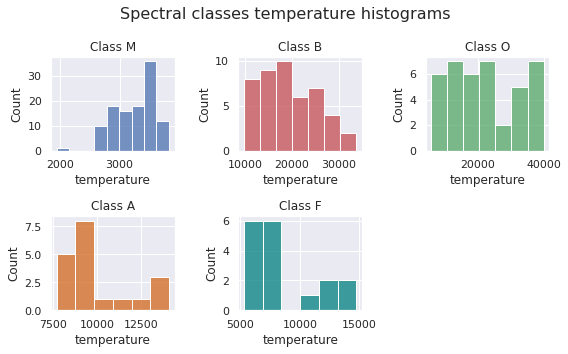

In [64]:
fig, ax = plt.subplots(2, 3, figsize= (8, 5))
fig.suptitle('Spectral classes temperature histograms', fontsize= 16)
ax1 = sns.histplot(data= df.query('spectral_class == "M"'), x= 'temperature', ax= ax[0, 0])
ax1.set_title('Class M')
ax2 = sns.histplot(data= df.query('spectral_class == "B"'), x= 'temperature', color= 'r', ax= ax[0, 1])
ax2.set_title('Class B')
ax3 = sns.histplot(data= df.query('spectral_class == "O"'), x= 'temperature', color= 'g', ax= ax[0, 2])
ax3.set_title('Class O')
ax4 = sns.histplot(data= df.query('spectral_class == "A"'), x= 'temperature', color= 'chocolate', ax= ax[1, 0])
ax4.set_title('Class A')
ax5 = sns.histplot(data= df.query('spectral_class == "F"'), x= 'temperature', color= 'teal', ax= ax[1, 1])
ax5.set_title('Class F')
fig.delaxes(ax[1, 2])
plt.tight_layout()
plt.show()

##### Boxplots:

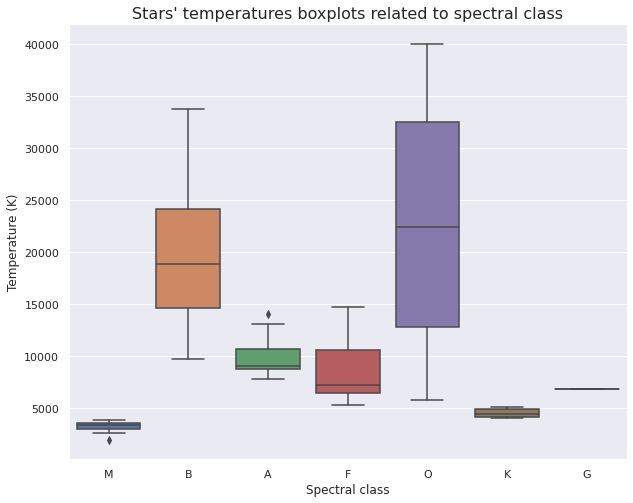

In [65]:
plt.figure(figsize= (10, 8))
sns.boxplot(data= df, x= 'spectral_class', y= 'temperature')
plt.title("Stars' temperatures boxplots related to spectral class", fontsize= 16)
plt.ylabel('Temperature (K)')
plt.xlabel('Spectral class')
plt.show()

#### Luminosity

##### Mean, median and standard deviation:

In [66]:
df.groupby('spectral_class').agg(['mean', 'median', 'std'])['luminosity']

,mean,median,std
spectral_class,,,
A,49860.247538,38.00000,150119.273329
B,78179.393322,0.03450,182294.647307
F,1.383960,0.00029,2.773895
G,229000.000000,229000.00000,NaN
K,152000.204167,0.49350,259922.922267
M,61423.425621,0.00240,111566.411903
O,330564.625000,245865.00000,198396.268958


##### Histograms:

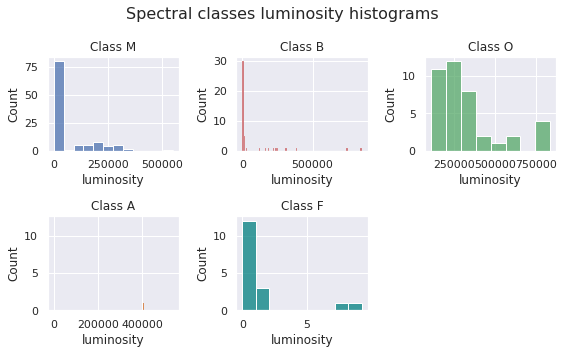

In [67]:
fig, ax = plt.subplots(2, 3, figsize= (8, 5))
fig.suptitle('Spectral classes luminosity histograms', fontsize= 16)
ax1 = sns.histplot(data= df.query('spectral_class == "M"'), x= 'luminosity', ax= ax[0, 0])
ax1.set_title('Class M')
ax2 = sns.histplot(data= df.query('spectral_class == "B"'), x= 'luminosity', color= 'r', ax= ax[0, 1])
ax2.set_title('Class B')
ax3 = sns.histplot(data= df.query('spectral_class == "O"'), x= 'luminosity', color= 'g', ax= ax[0, 2])
ax3.set_title('Class O')
ax4 = sns.histplot(data= df.query('spectral_class == "A"'), x= 'luminosity', color= 'chocolate', ax= ax[1, 0])
ax4.set_title('Class A')
ax5 = sns.histplot(data= df.query('spectral_class == "F"'), x= 'luminosity', color= 'teal', ax= ax[1, 1])
ax5.set_title('Class F')
fig.delaxes(ax[1, 2])
plt.tight_layout()
plt.show()

##### Boxplots:

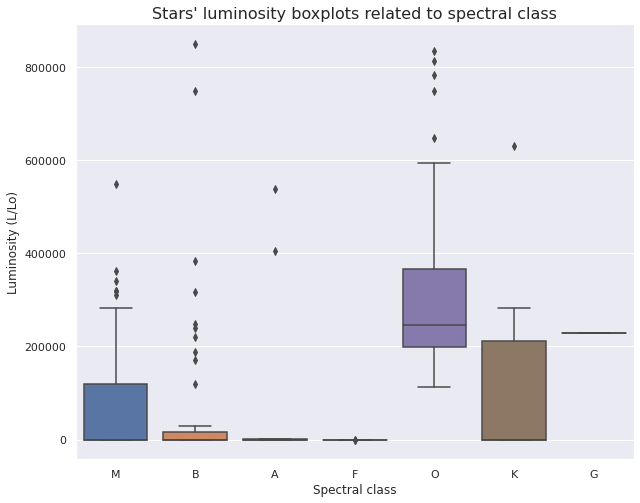

In [68]:
plt.figure(figsize= (10, 8))
ax = sns.boxplot(data= df, x= 'spectral_class', y= 'luminosity')
ax.set_title("Stars' luminosity boxplots related to spectral class", fontsize= 16)
plt.xlabel('Spectral class')
plt.ylabel('Luminosity (L/Lo)')
plt.show()

#### Radius

##### Mean, median and standard deviation:

In [69]:
df.groupby('spectral_class').agg(['mean', 'median', 'std'])['radius']

,mean,median,std
spectral_class,,,
A,135.878422,2.4870,402.142640
B,202.022292,0.0146,493.825127
F,0.551334,0.0130,0.632965
G,1467.000000,1467.0000,NaN
K,475.444333,1.0030,738.390214
M,273.894832,0.2910,551.585254
O,257.794675,57.0000,521.810621


##### Histogram:

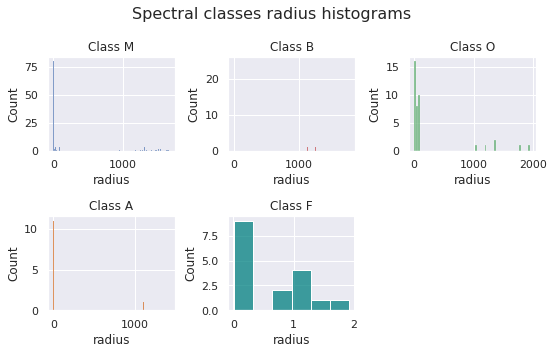

In [70]:
fig, ax = plt.subplots(2, 3, figsize= (8, 5))
fig.suptitle('Spectral classes radius histograms', fontsize= 16)
ax1 = sns.histplot(data= df.query('spectral_class == "M"'), x= 'radius', ax= ax[0, 0])
ax1.set_title('Class M')
ax2 = sns.histplot(data= df.query('spectral_class == "B"'), x= 'radius', color= 'r', ax= ax[0, 1])
ax2.set_title('Class B')
ax3 = sns.histplot(data= df.query('spectral_class == "O"'), x= 'radius', color= 'g', ax= ax[0, 2])
ax3.set_title('Class O')
ax4 = sns.histplot(data= df.query('spectral_class == "A"'), x= 'radius', color= 'chocolate', ax= ax[1, 0])
ax4.set_title('Class A')
ax5 = sns.histplot(data= df.query('spectral_class == "F"'), x= 'radius', color= 'teal', ax= ax[1, 1])
ax5.set_title('Class F')
fig.delaxes(ax[1, 2])
plt.tight_layout()
plt.show()

##### Boxplot:

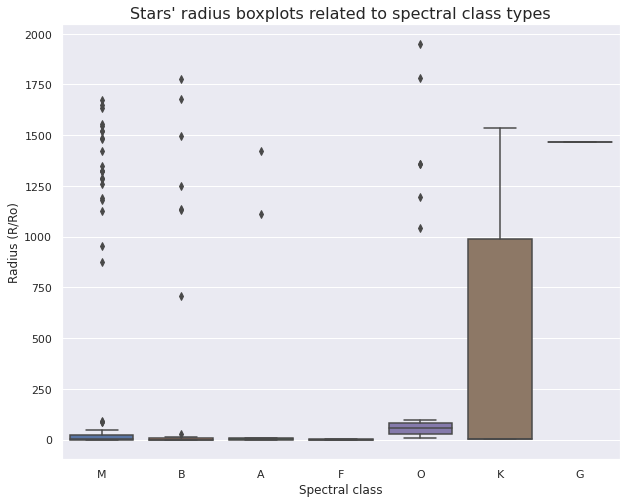

In [71]:
plt.figure(figsize= (10, 8))
ax = sns.boxplot(data= df, x= 'spectral_class', y= 'radius')
ax.set_title("Stars' radius boxplots related to spectral class types", fontsize= 16)
plt.xlabel('Spectral class')
plt.ylabel('Radius (R/Ro)')
plt.show()

#### Absolute magnitude

##### Mean, median and standard deviation:

In [72]:
df.groupby('spectral_class').agg(['mean', 'median', 'std'])['absolute_magnitude']

,mean,median,std
spectral_class,,,
A,4.085211,1.236,8.753602
B,3.722609,10.365,8.764962
F,8.611765,12.020,5.344170
G,-10.070000,-10.070,NaN
K,0.267333,4.730,8.243908
M,8.367829,13.120,11.106946
O,-6.596175,-6.235,1.514559


##### Histogram:

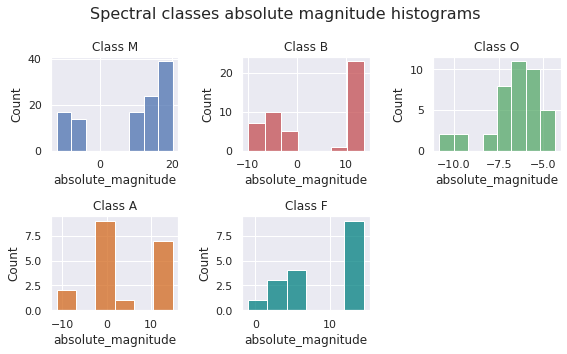

In [73]:
fig, ax = plt.subplots(2, 3, figsize= (8, 5))
fig.suptitle('Spectral classes absolute magnitude histograms', fontsize= 16)
ax1 = sns.histplot(data= df.query('spectral_class == "M"'), x= 'absolute_magnitude', ax= ax[0, 0])
ax1.set_title('Class M')
ax2 = sns.histplot(data= df.query('spectral_class == "B"'), x= 'absolute_magnitude', color= 'r', ax= ax[0, 1])
ax2.set_title('Class B')
ax3 = sns.histplot(data= df.query('spectral_class == "O"'), x= 'absolute_magnitude', color= 'g', ax= ax[0, 2])
ax3.set_title('Class O')
ax4 = sns.histplot(data= df.query('spectral_class == "A"'), x= 'absolute_magnitude', color= 'chocolate', ax= ax[1, 0])
ax4.set_title('Class A')
ax5 = sns.histplot(data= df.query('spectral_class == "F"'), x= 'absolute_magnitude', color= 'teal', ax= ax[1, 1])
ax5.set_title('Class F')
fig.delaxes(ax[1, 2])
plt.tight_layout()
plt.show()

##### Boxplot:

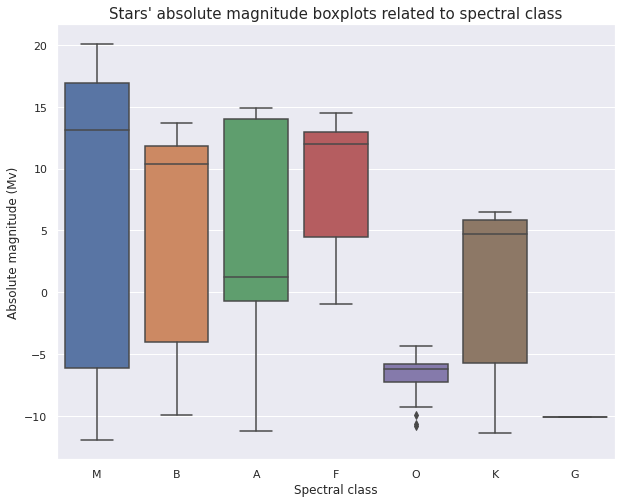

In [74]:
plt.figure(figsize= (10, 8))
ax = sns.boxplot(data= df, x= 'spectral_class', y= 'absolute_magnitude')
ax.set_title("Stars' absolute magnitude boxplots related to spectral class", fontsize= 15)
plt.xlabel('Spectral class')
plt.ylabel('Absolute magnitude (Mv)')
plt.show()

## Column `star_type`

In [75]:
f'There are {df["star_type"].nunique()} different star types in the database.'

'There are 6 different star types in the database.'

The types are:

In [76]:
df['star_type'].unique()

array([0, 1, 2, 3, 4, 5])

### Count

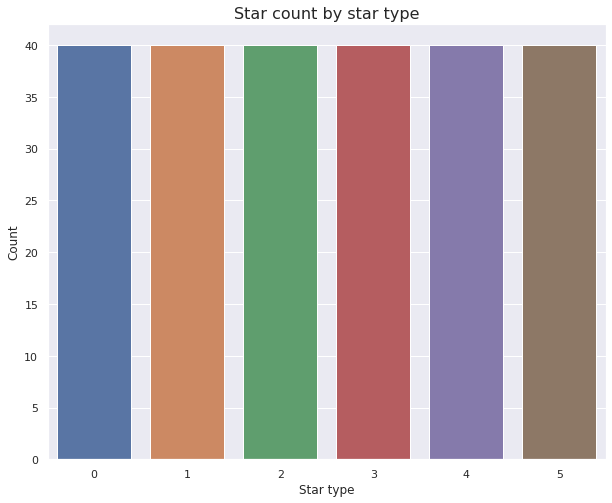

In [77]:
plt.figure(figsize= (10, 8))
ax = sns.countplot(data= df, x= 'star_type', orient= 'horizontal')
ax.set_title('Star count by star type', fontsize= 16)
plt.xlabel('Star type')
plt.ylabel('Count')
plt.show()

### Crosstabs

#### `star_type` and `star_color`

In [78]:
type_color = pd.crosstab(df['star_type'], df['star_color'])

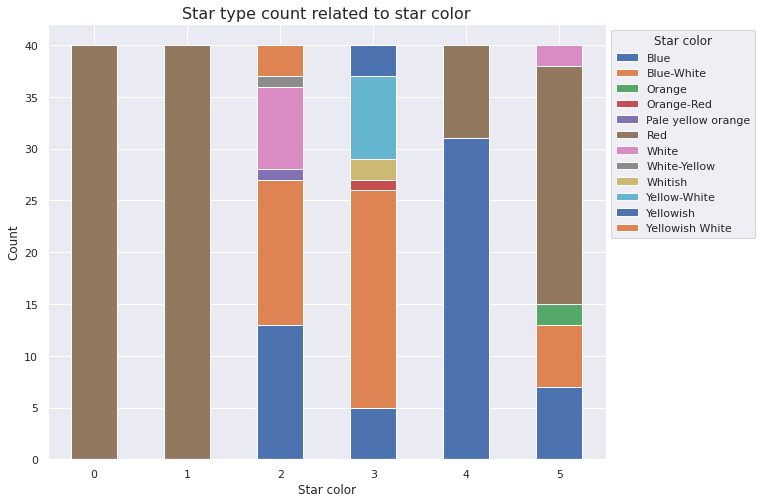

In [79]:
ax = type_color.plot(kind= 'bar', stacked= True, rot= 0, figsize= (10, 8))
ax.set_title('Star type count related to star color', fontsize= 16)
ax.legend(title= 'Star color', bbox_to_anchor= (1, 1))
plt.xlabel('Star color')
plt.ylabel('Count')
plt.show()

#### `star_type` and `spectral_class`

In [80]:
type_spectral = pd.crosstab(df['star_type'], df['spectral_class'])

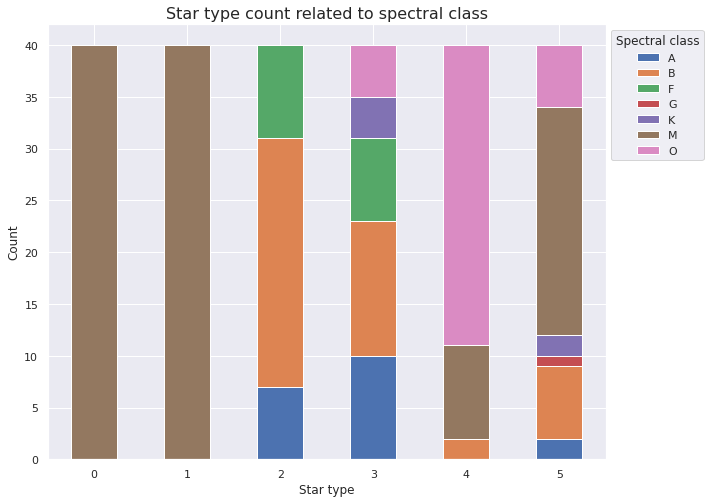

In [81]:
ax = type_spectral.plot(kind= 'bar', stacked= True, rot= 0, figsize= (10, 8))
ax.legend(title= 'Spectral class', bbox_to_anchor= (1, 1))
plt.title('Star type count related to spectral class', fontsize= 16)
plt.xlabel('Star type')
plt.ylabel('Count')
plt.show()

### How does each variable behave for each type?

#### Temperature

##### Mean, median and standard deviation:

In [82]:
df.groupby('star_type').agg(['mean', 'median', 'std'])['temperature']

,mean,median,std
star_type,,,
0,2997.950,2935.0,332.276295
1,3283.825,3314.0,269.637258
2,13931.450,13380.0,4957.655189
3,16018.000,12560.5,10661.234972
4,15347.850,12821.0,10086.784628
5,11405.700,3766.0,11816.991886


##### Histogram:

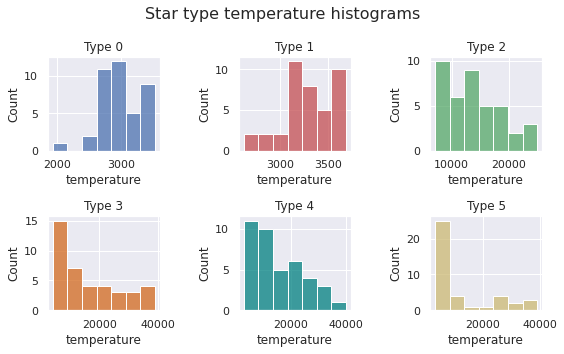

In [83]:
fig, ax = plt.subplots(2, 3, figsize= (8, 5))
fig.suptitle('Star type temperature histograms', fontsize= 16)
ax1 = sns.histplot(data= df.query('star_type == 0'), x= 'temperature', ax= ax[0, 0])
ax1.set_title('Type 0')
ax2 = sns.histplot(data= df.query('star_type == 1'), x= 'temperature', color= 'r', ax= ax[0, 1])
ax2.set_title('Type 1')
ax3 = sns.histplot(data= df.query('star_type == 2'), x= 'temperature', color= 'g', ax= ax[0, 2])
ax3.set_title('Type 2')
ax4 = sns.histplot(data= df.query('star_type == 3'), x= 'temperature', color= 'chocolate', ax= ax[1, 0])
ax4.set_title('Type 3')
ax5 = sns.histplot(data= df.query('star_type == 4'), x= 'temperature', color= 'teal', ax= ax[1, 1])
ax5.set_title('Type 4')
ax6 = sns.histplot(data= df.query('star_type == 5'), x= 'temperature', color= 'y', ax= ax[1, 2])
ax6.set_title('Type 5')
plt.tight_layout()
plt.show()

##### Boxplots:

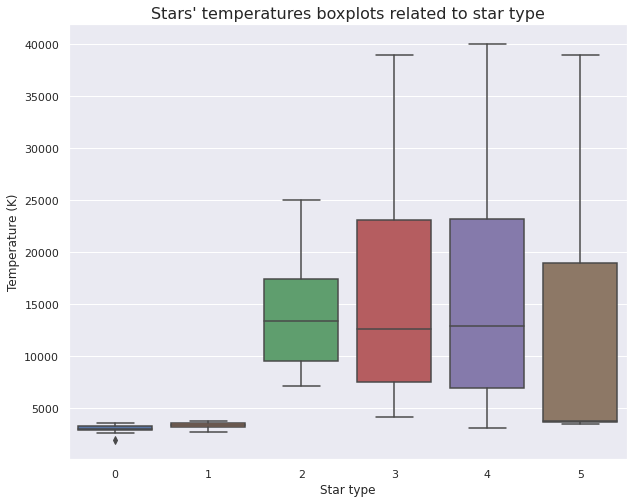

In [84]:
plt.figure(figsize= (10, 8))
ax = sns.boxplot(data= df, x= 'star_type', y= 'temperature')
ax.set_title("Stars' temperatures boxplots related to star type", fontsize= 16)
plt.xlabel('Star type')
plt.ylabel('Temperature (K)')
plt.show()

##### Hypothesis test:

* Samples:

In [85]:
type_2 = df.query('star_type == 2')['temperature']

In [86]:
type_3 = df.query('star_type == 3')['temperature']

In [87]:
type_4 = df.query('star_type == 4')['temperature']

* Hypothesis:

The medians of stars of types 2, 3 and 4 are close. Is it possible to say that they are statistically different? 

$md_2 ⇒$ Star type 2 median;

$md_3 ⇒$ Star type 3 median; 

$md_4 ⇒$ Star type 4 median; 

$H_0: md_2 = md_3 = md_4$ 

$H_1:$ At least the median of one of the samples is different. 

* Test:

Since it is not possible to affirm that the variables follow a normal distribution, it is important to carry out non-parametric statistical tests. As we want to compare the medians of more than two samples, we will use the Kruskal-Wallis test.

In [88]:
from scipy.stats import kruskal

In [89]:
stat, pvalue = kruskal(type_2, type_3, type_4)

In [90]:
f'pvalue: {pvalue}'

'pvalue: 0.9912164883701264'

Hypothesis $H_0$ is rejected if $pvalue \leq α$. We assume that $α$ is 5%.

In [91]:
pvalue <= 0.05

False

Since the condition for rejecting the null hypothesis is not satisfied, we fail to reject $H_0$. We assume, therefore, that the medians of the samples are statistically equivalent.

#### Luminosity 

##### Mean, median and standard deviation:

In [92]:
df.groupby('star_type').agg(['mean', 'median', 'std'])['luminosity']

,mean,median,std
star_type,,,
0,0.000693,0.00052,0.000888
1,0.005406,0.00315,0.007330
2,0.002434,0.00076,0.008912
3,32067.386275,738.50000,69351.195858
4,301816.250000,242145.00000,175756.378119
5,309246.525000,266500.00000,199343.999427


##### Histograms:

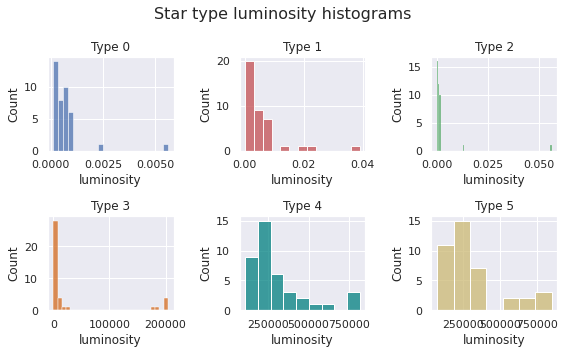

In [93]:
fig, ax = plt.subplots(2, 3, figsize= (8, 5))
fig.suptitle('Star type luminosity histograms', fontsize= 16)
ax1 = sns.histplot(data= df.query('star_type == 0'), x= 'luminosity', ax= ax[0, 0])
ax1.set_title('Type 0')
ax2 = sns.histplot(data= df.query('star_type == 1'), x= 'luminosity', color= 'r', ax= ax[0, 1])
ax2.set_title('Type 1')
ax3 = sns.histplot(data= df.query('star_type == 2'), x= 'luminosity', color= 'g', ax= ax[0, 2])
ax3.set_title('Type 2')
ax4 = sns.histplot(data= df.query('star_type == 3'), x= 'luminosity', color= 'chocolate', ax= ax[1, 0])
ax4.set_title('Type 3')
ax5 = sns.histplot(data= df.query('star_type == 4'), x= 'luminosity', color= 'teal', ax= ax[1, 1])
ax5.set_title('Type 4')
ax6 = sns.histplot(data= df.query('star_type == 5'), x= 'luminosity', color= 'y', ax= ax[1, 2])
ax6.set_title('Type 5')
plt.tight_layout()
plt.show()

##### Boxplots:

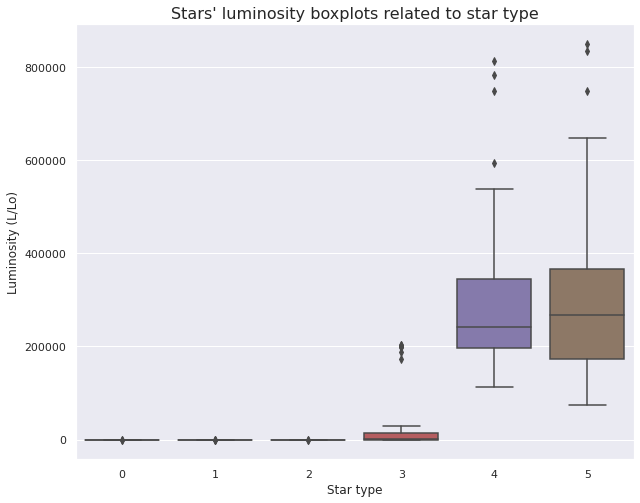

In [94]:
plt.figure(figsize= (10, 8))
ax = sns.boxplot(data= df, x= 'star_type', y= 'luminosity')
ax.set_title("Stars' luminosity boxplots related to star type", fontsize= 16)
plt.xlabel('Star type')
plt.ylabel('Luminosity (L/Lo)')
plt.show()

##### Hypothesis test:

* Samples:

In [95]:
type_4 = df.query('star_type == 4')['luminosity']

In [96]:
type_5 = df.query('star_type == 5')['luminosity']

* Hypothesis:

The medians of stars of types 4 and 5 are close. Is it possible to say that they are statistically different? 

$md_4 ⇒$ Star type 4 median;

$md_5 ⇒$ Star type 5 median;

$H_0: md_4 = md_5$

$H_1: md_4 \neq md_5$

* Test:

As the data do not present normal distribution and the same variance, the non-parametric Mann-Whitney test was used.

In [97]:
from scipy.stats import mannwhitneyu

In [98]:
stat, pvalue = mannwhitneyu(type_4, type_5, alternative= 'two-sided')

In [99]:
f'pvalue: {pvalue}'

'pvalue: 0.9577862149892067'

Hypothesis $H_0$ is rejected if $pvalue \leq α$. We assume that $α$ is 5%.

In [100]:
pvalue <= 0.05

False

Since the condition for rejecting the null hypothesis is not satisfied, we fail to reject $H_0$. We assume, therefore, that the medians of the samples are statistically equivalent.

#### Radius

* Mean, median and standard deviation:

In [101]:
df.groupby('star_type').agg(['mean', 'median', 'std'])['radius']

,mean,median,std
star_type,,,
0,0.110015,0.1060,0.025783
1,0.348145,0.3380,0.154453
2,0.010728,0.0102,0.001725
3,4.430300,5.7125,2.801390
4,51.150000,43.5000,27.656826
5,1366.897500,1352.5000,255.561357


* Histograms:

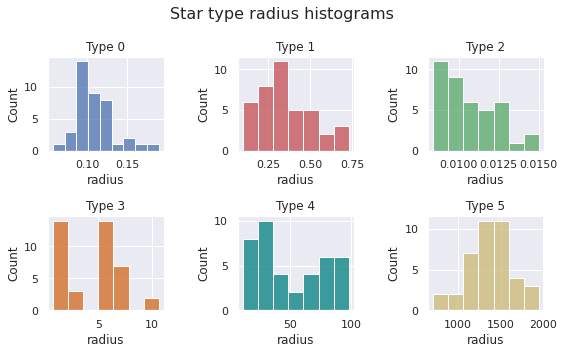

In [102]:
fig, ax = plt.subplots(2, 3, figsize= (8, 5))
fig.suptitle('Star type radius histograms', fontsize= 16)
ax1 = sns.histplot(data= df.query('star_type == 0'), x= 'radius', ax= ax[0, 0])
ax1.set_title('Type 0')
ax2 = sns.histplot(data= df.query('star_type == 1'), x= 'radius', color= 'r', ax= ax[0, 1])
ax2.set_title('Type 1')
ax3 = sns.histplot(data= df.query('star_type == 2'), x= 'radius', color= 'g', ax= ax[0, 2])
ax3.set_title('Type 2')
ax4 = sns.histplot(data= df.query('star_type == 3'), x= 'radius', color= 'chocolate', ax= ax[1, 0])
ax4.set_title('Type 3')
ax5 = sns.histplot(data= df.query('star_type == 4'), x= 'radius', color= 'teal', ax= ax[1, 1])
ax5.set_title('Type 4')
ax6 = sns.histplot(data= df.query('star_type == 5'), x= 'radius', color= 'y', ax= ax[1, 2])
ax6.set_title('Type 5')
plt.tight_layout()
plt.show()

* Boxplots:

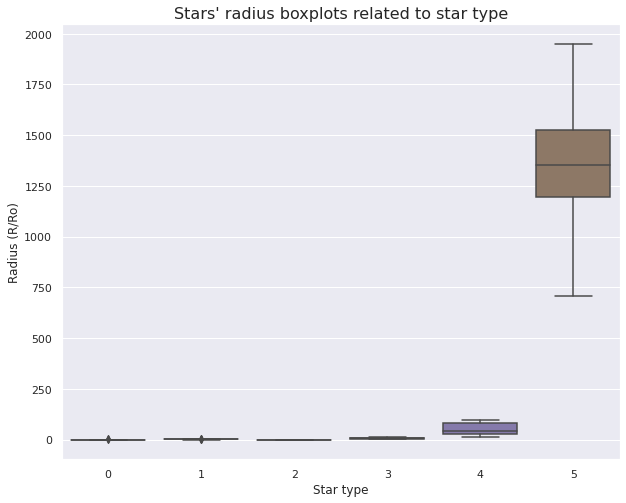

In [103]:
plt.figure(figsize= (10, 8))
ax = sns.boxplot(data= df, x= 'star_type', y= 'radius')
ax.set_title("Stars' radius boxplots related to star type", fontsize= 16)
plt.xlabel('Star type')
plt.ylabel('Radius (R/Ro)')
plt.show()

#### Absolute magnitude

##### Mean, median and standard deviation:

In [104]:
df.groupby('star_type').agg(['mean', 'median', 'std'])['absolute_magnitude']

,mean,median,std
star_type,,,
0,17.563500,17.145,1.213111
1,12.539975,12.605,1.422816
2,12.582500,12.340,1.278386
3,-0.367425,-1.180,3.613592
4,-6.369925,-6.235,0.560051
5,-9.654250,-9.915,1.453605


##### Histograms:

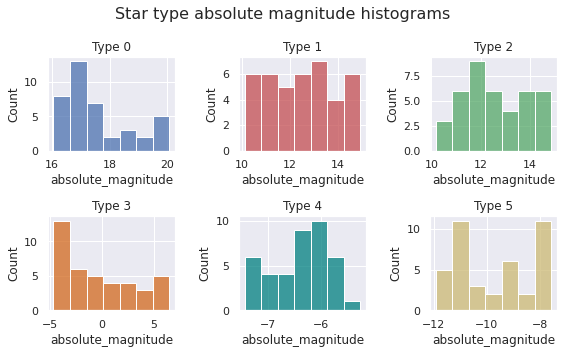

In [105]:
fig, ax = plt.subplots(2, 3, figsize= (8, 5))
fig.suptitle('Star type absolute magnitude histograms', fontsize= 16)
ax1 = sns.histplot(data= df.query('star_type == 0'), x= 'absolute_magnitude', ax= ax[0, 0])
ax1.set_title('Type 0')
ax2 = sns.histplot(data= df.query('star_type == 1'), x= 'absolute_magnitude', color= 'r', ax= ax[0, 1])
ax2.set_title('Type 1')
ax3 = sns.histplot(data= df.query('star_type == 2'), x= 'absolute_magnitude', color= 'g', ax= ax[0, 2])
ax3.set_title('Type 2')
ax4 = sns.histplot(data= df.query('star_type == 3'), x= 'absolute_magnitude', color= 'chocolate', ax= ax[1, 0])
ax4.set_title('Type 3')
ax5 = sns.histplot(data= df.query('star_type == 4'), x= 'absolute_magnitude', color= 'teal', ax= ax[1, 1])
ax5.set_title('Type 4')
ax6 = sns.histplot(data= df.query('star_type == 5'), x= 'absolute_magnitude', color= 'y', ax= ax[1, 2])
ax6.set_title('Type 5')
plt.tight_layout()
plt.show()

##### Boxplots:

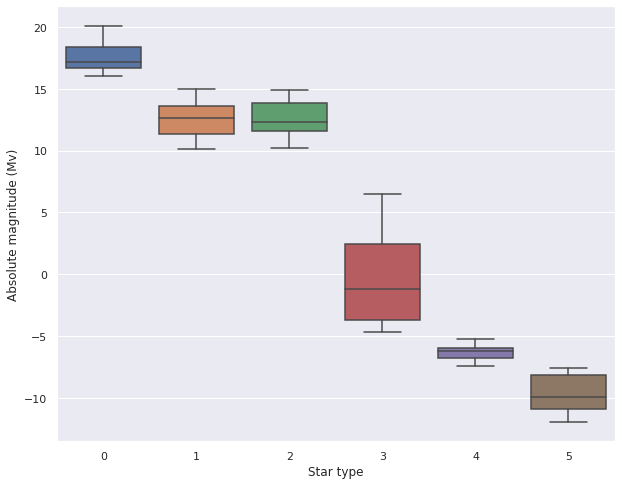

In [106]:
plt.figure(figsize= (10, 8 ))
ax = sns.boxplot(data= df, x= 'star_type', y= 'absolute_magnitude')
plt.xlabel('Star type')
plt.ylabel('Absolute magnitude (Mv)')
plt.show()

##### Hypothesis test

The means and medians of the absolute magnitudes of type 1 and type 2 stars are close. However, is it possible to say that they are statistically equivalent?

* Normality of data distribution:

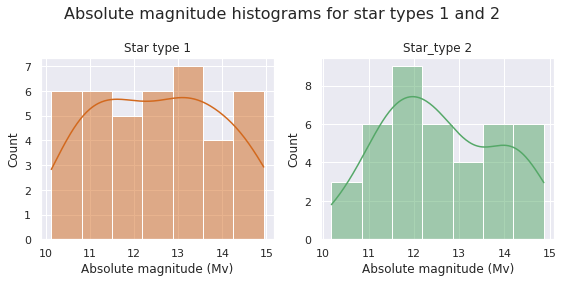

In [107]:
fig, ax = plt.subplots(1, 2, figsize= (8, 4))
plt.suptitle('Absolute magnitude histograms for star types 1 and 2', fontsize= 16)
ax1 = sns.histplot(data= df.query('star_type == 1'), x= 'absolute_magnitude', color= 'chocolate', kde= True, ax= ax[0])
ax1.set_title('Star type 1')
ax1.set_xlabel('Absolute magnitude (Mv)')
ax2 = sns.histplot(data= df.query('star_type == 2'), x= 'absolute_magnitude', color= 'g', kde= True, ax= ax[1])
ax2.set_title('Star_type 2')
ax2.set_xlabel('Absolute magnitude (Mv)')
plt.tight_layout()
plt.show()

In [108]:
import statsmodels.api as sm

/usr/local/lib/python3.8/dist-packages/statsmodels/graphics/gofplots.py:993: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "bo" (-> marker='o'). The keyword argument will take precedence.
  ax.plot(x, y, fmt, **plot_style)


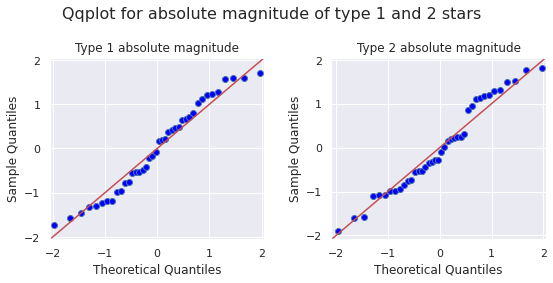

In [109]:
fig, ax = plt.subplots(1, 2, figsize= (8, 4))
fig.suptitle('Qqplot for absolute magnitude of type 1 and 2 stars', fontsize= 16)
ax1 = sm.qqplot(data= df.query('star_type == 1')['absolute_magnitude'], line= '45', fit= True, ax= ax[0])
ax[0].set_title('Type 1 absolute magnitude')
ax2 = sm.qqplot(data= df.query('star_type == 2')['absolute_magnitude'], line= '45', fit= True, ax= ax[1])
ax[1].set_title('Type 2 absolute magnitude')
plt.tight_layout()

The qqplot analysis indicates that the variables follow a normal distribution, which can also be verified with the Shapiro-Wilk test.

In [110]:
from scipy.stats import shapiro

In [111]:
stat1, pvalue1 = shapiro(df.query('star_type == 1')['absolute_magnitude'])

In [112]:
stat2, pvalue2 = shapiro(df.query('star_type == 2')['absolute_magnitude'])

Adopting an $α$ of 5%.

In [113]:
pvalue1 <= 0.05

False

In [114]:
pvalue2 <= 0.05

False

In both cases the p value of the samples is greater than the $α$ value. Therefore, we fail to reject hypothesis $H_0$, and the distribution of variables follows a normal distribution.

* Samples:

In [115]:
type_1 = df.query('star_type == 1')['absolute_magnitude']

In [116]:
type_2 = df.query('star_type == 2')['absolute_magnitude']

* Hypothesis:

$\mu_1 ⇒$ Average absolute magnitude of type 1 stars.

$\mu_2 ⇒$ Average absolute magnitude of type 2 stars.

$H_0: \mu_1 = \mu_2$

$H_1: \mu_1 \neq \mu_2$

* Test:

As the data follow a normal distribution and $n$ $\geq$ 30, the $z$ test for two samples is used.

In [117]:
from statsmodels.stats.weightstats import DescrStatsW

In [118]:
test_1 = DescrStatsW(type_1)

In [119]:
test_2 = DescrStatsW(type_2)

In [120]:
test = test_1.get_compare(test_2)

In [121]:
stat, pvalue = test.ztest_ind(alternative= 'two-sided', value= 0)

In [122]:
f'pvalue: {pvalue}'

'pvalue: 0.888179025459078'

Hypothesis $H_0$ is rejected if $pvalue \leq α$. We assume that $α$ is 5%.

In [123]:
pvalue <= 0.05

False

As the condition to reject the null hypothesis is not satisfied, we fail to reject $H_0$. We therefore assume that the sample means are statistically equivalent.

## Pairplot

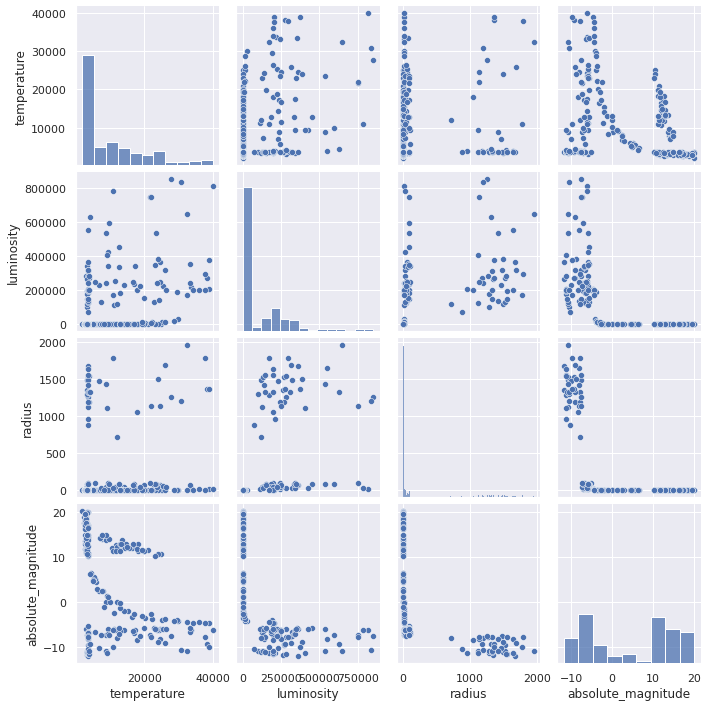

In [162]:
sns.pairplot(data= df.drop('star_type', axis= 1))

# Correlation analysis

In [124]:
df.drop('star_type', axis= 1).corr()

,temperature,luminosity,radius,absolute_magnitude
temperature,1.000000,0.393404,0.064216,-0.420261
luminosity,0.393404,1.000000,0.526516,-0.692619
radius,0.064216,0.526516,1.000000,-0.608728
absolute_magnitude,-0.420261,-0.692619,-0.608728,1.000000


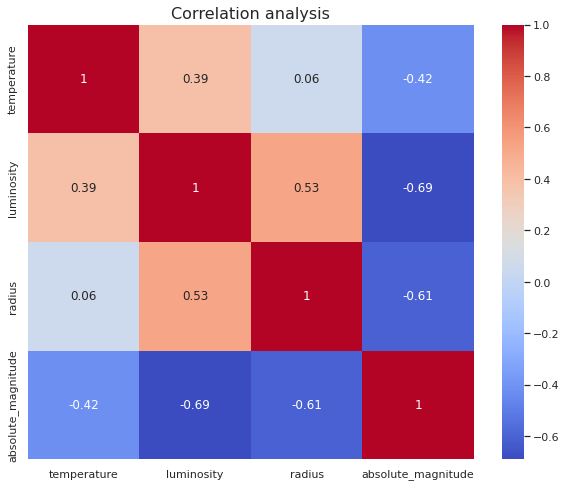

In [125]:
plt.figure(figsize= (10, 8))
ax = sns.heatmap(data= df.drop('star_type', axis= 1).corr().round(2), cmap= 'coolwarm', annot= True)
ax.set_title('Correlation analysis', fontsize= 16)
plt.show()

# Machine learning model

## Splitting data in train and test

In [126]:
from sklearn.model_selection import train_test_split

In [127]:
X = df.drop('star_type', axis= 1)

In [128]:
y = df['star_type']

In [129]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.3, random_state= 42)

## Data pre-processing

In [130]:
df.head()

,temperature,luminosity,radius,absolute_magnitude,star_type,star_color,spectral_class
0,3068,0.002400,0.1700,16.12,0,Red,M
1,3042,0.000500,0.1542,16.60,0,Red,M
2,2600,0.000300,0.1020,18.70,0,Red,M
3,2800,0.000200,0.1600,16.65,0,Red,M
4,1939,0.000138,0.1030,20.06,0,Red,M


### Column `spectral_class`

The spectral class is an ordinal categorical variable. Therefore, the data is sorted in the following order: M, K, G, F, A, B, O.

In [131]:
X_train['spectral_class'] = X_train['spectral_class'].map({'M': 0, 'K': 1, 'G': 2, 'F': 3, 'A': 4, 'B': 5, 'O': 6})

In [132]:
X_test['spectral_class'] = X_test['spectral_class'].map({'M': 0, 'K': 1, 'G': 2, 'F': 3, 'A': 4, 'B': 5, 'O': 6})

### Column `star_color`

In [133]:
!pip install category_encoders

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 81.2/81.2 KB 3.1 MB/s eta 0:00:00


In [134]:
from category_encoders.one_hot import OneHotEncoder

In [135]:
one_hot = OneHotEncoder(['star_color'], use_cat_names= True)

In [136]:
X_train = one_hot.fit_transform(X_train)

In [137]:
X_test = one_hot.transform(X_test)

## Logistic Regression

In [138]:
from sklearn.linear_model import LogisticRegression

In [139]:
lr = LogisticRegression(random_state= 42, max_iter= 4000, C= 1, penalty= 'l2', tol= 0.01, solver= 'lbfgs')

### Model training

In [140]:
lr.fit(X_train, y_train)

LogisticRegression(C=1, max_iter=4000, random_state=42, tol=0.01)

### Predicting values with test data

In [146]:
y_predict = lr.predict(X_test)

#### Checking model metrics

In [147]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

* Accuracy:

In [148]:
f'Accuracy: {round(accuracy_score(y_test, y_predict) * 100, 2)}%'

'Accuracy: 97.22%'

* Classification report:

In [149]:
print(classification_report(y_test, y_predict))

              precision    recall  f1-score   support

           0       0.93      1.00      0.97        14
           1       1.00      0.92      0.96        12
           2       1.00      1.00      1.00        10
           3       1.00      0.90      0.95        10
           4       0.92      1.00      0.96        11
           5       1.00      1.00      1.00        15

    accuracy                           0.97        72
   macro avg       0.98      0.97      0.97        72
weighted avg       0.97      0.97      0.97        72



### Predicting values with train data

In [150]:
y_pred_train = lr.predict(X_train)

#### Checking model metrics

* Accuracy:

In [151]:
f'Accuracy: {round(accuracy_score(y_train, y_pred_train) * 100, 2)}%'

'Accuracy: 98.81%'

* Classification report:

In [152]:
print(classification_report(y_train, y_pred_train))

              precision    recall  f1-score   support

           0       0.96      0.96      0.96        26
           1       0.96      0.96      0.96        28
           2       1.00      1.00      1.00        30
           3       1.00      1.00      1.00        30
           4       1.00      1.00      1.00        29
           5       1.00      1.00      1.00        25

    accuracy                           0.99       168
   macro avg       0.99      0.99      0.99       168
weighted avg       0.99      0.99      0.99       168

